# Zbiór treningowy i testowy

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)

In [8]:
df.columns=['Size','Bedrooms','Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [9]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print(X.shape,y.shape)

(47, 2) (47,)


In [12]:
print(X_train.shape,y_train.shape)

(37, 2) (37,)


In [13]:
print(X_test.shape,y_test.shape)

(10, 2) (10,)


# Zbiór walidacyjny

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=1)

In [17]:
print(X.shape,y.shape)

(47, 2) (47,)


In [18]:
print(X_train.shape,y_train.shape)

(27, 2) (27,)


In [19]:
print(X_val.shape,y_val.shape)

(10, 2) (10,)


In [20]:
print(X_test.shape,y_test.shape)

(10, 2) (10,)


# Kroswalidacja / Sprawdzian krzyżowy
- użyteczna w przypadku małej ilości danych
- zbiór danych powinien zaczynać się od 30 obserwacji (rozkład t-studenta zbiega się do rozkładu normalnego)

## k-krotna walidacja
Dzielimy dane na k zbiory, k-1 służy do trenowania, a k do testowania.
Następnie zamiana zbiorów do nauki- wszystko k - krotnie.
Wynikiem jest uśrednienie wszystkich pojedynczych wyników.

In [21]:
import pandas as pd
from sklearn.model_selection import KFold

In [22]:
cv=KFold(n_splits=5,shuffle=True,random_state=42)
for train,test in cv.split(X,y):
  X_train,y_train=X.iloc[train],y.iloc[train]
  X_test,y_test=X.iloc[test],y.iloc[test]
  print(X_train.shape,X_test.shape)

(37, 2) (10, 2)
(37, 2) (10, 2)
(38, 2) (9, 2)
(38, 2) (9, 2)
(38, 2) (9, 2)


## walidacja leave one out
- do mega małych zbiorów
- zbiór walidaycyjny ma jedną oberwację, reszta służy do treningu

In [23]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut

In [24]:
cv=LeaveOneOut()
for train,test in cv.split(X,y):
  X_train,y_train=X.iloc[train],y.iloc[train]
  X_test,y_test=X.iloc[test],y.iloc[test]
  print(X_train.shape,X_test.shape)

(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)


# Ocena jakości modelu

## Współczynnik dopasowania R^2
- przyjmuje wartości (0,1), gdy R^2=1 super model, wartości resztowe =0
- np 0.62, 62% regresji pasuje do Y
- bardzo tricky check

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [26]:
X=df[['Size']]
y=df['Price']
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [27]:
y_predict=model.predict(X)

In [28]:
r2_score(y,y_predict)
# 72% zmian zmiennej objaśnianej jest wyjaśniona przez zmiany zmiennej objaśniające

0.7310037839755306

In [29]:
# dopasowane R^2
# każe za dodanie zmiennej
Adj_r2 = 1 - (1-r2_score(y,y_predict)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.7250260902860979

## Rozszerzony model

In [30]:
X=df[['Size','Bedrooms']]
y=df['Price']

model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [31]:
y_predict=model.predict(X)

In [32]:
r2_score(y,y_predict)

0.7329450180289142

In [33]:
# dopasowane R^2
Adj_r2 = 1 - (1-r2_score(y,y_predict)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.7208061552120466

## MAE
- Mean Absolute Error
- mierzy średnią różnicę pomiędzy wartościami rzeczywistymi a przewidzianymi
- mniejsze MAE lepszy wynik

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [35]:
X=df[['Size']]
y=df['Price']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_predict=model.predict(X_test)

In [39]:
mean_absolute_error(y_test,y_predict)

69978.50296543419

## Rozszerzony model

In [40]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
mean_absolute_error(y_test,y_predict)

69978.50296543419

## MAPE
- Mean Absolute Percentage Error
- tak jak MAE, ale pojedynczy wynik jest dzielony przez wartość prawdziwą
- przyjmuje wartości (0,1), gdy MAPE = 1 model myli się w 100%

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [46]:
X=df[['Size']]
y=df['Price']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
y_predict=model.predict(X_test)

In [50]:
mean_absolute_percentage_error(y_test,y_predict)
# model myli się o 16%

0.16923890848871587

## Rozszerzony model

In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [52]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [55]:
y_predict=model.predict(X_test)

In [56]:
mean_absolute_percentage_error(y_test,y_predict)

0.17460519278319336

# MSE
- skupia się na dużych błędach
- bedzie podkreślać wartości odstające
- róznica między wartością rzeczywistą i przewidywaną podnoszona do potęgi

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [58]:
X=df[['Size']]
y=df['Price']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_predict=model.predict(X_test)

In [62]:
mean_squared_error(y_test,y_predict)

8407789060.4898405

# Rozszerzony model 

In [63]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [64]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [67]:
y_predict=model.predict(X_test)

In [68]:
mean_squared_error(y_test,y_predict)

8610424544.777676

# RMSE
- pierwiastek kwadratowy z MSE

# import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [69]:
X=df[['Size']]
y=df['Price']

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [72]:
y_predict=model.predict(X_test)

In [73]:
mean_squared_error(y_test,y_predict,squared=False)

91693.99686178938

# Rozszerzony model

In [74]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [75]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [78]:
y_predict=model.predict(X_test)

In [79]:
mean_squared_error(y_test,y_predict,squared=False)

92792.37331148329

# Wykres zbiór treningowy vs walidacyjny

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Wczytajmy dane
url='https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df = pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [81]:
y=df[['cnt']]
X=df[['atemp','hum','windspeed']]

In [82]:
y.shape

(731, 1)

In [83]:
X.shape

(731, 3)

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=1)

In [85]:
X_train.shape

(438, 3)

In [86]:
X_test.shape

(147, 3)

In [87]:
X_val.shape

(146, 3)

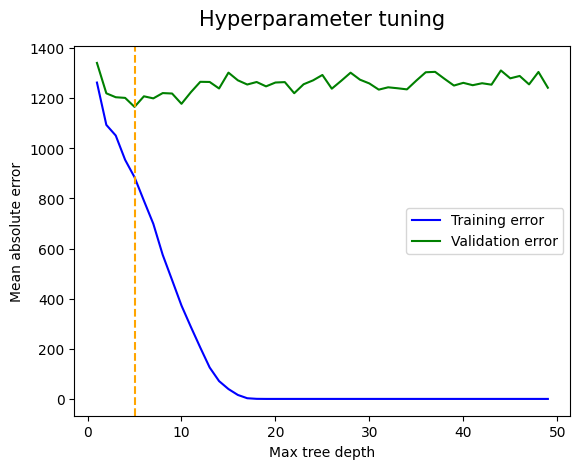

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

max_depths=range(1,50)
training_error=[]
validation_error=[]
for max_depth in max_depths:
    model_1=DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X_train,y_train)
    
    pred_1=model_1.predict(X_train)
    training_error.append(mean_absolute_error(y_train,pred_1))

    pred_2=model_1.predict(X_val)
    validation_error.append(mean_absolute_error(y_val,pred_2))

plt.plot(max_depths,training_error,color='blue',label='Training error')
plt.plot(max_depths,validation_error,color='green',label='Validation error')
plt.xlabel('Max tree depth')
plt.axvline(x=np.argmin(validation_error)+1,color='orange',linestyle='--')

plt.ylabel('Mean absolute error')
plt.title('Hyperparameter tuning',pad=15,size=15)
plt.legend()

In [89]:
# Poglębianie drzewa od okołu depth 5 nie mas sensu, w miarę pogłębiania się
# drzewa validation zbiór zwiękasz MAE

In [90]:
np.argmin(validation_error)+1

5

# Kroswalidacja w praktyce

In [91]:
from sklearn.model_selection import cross_val_score, KFold

In [92]:
kf=KFold(n_splits=10,random_state=8,shuffle=True)
model=DecisionTreeRegressor(random_state=8,max_depth=2)
score=cross_val_score(model,X_train,y_train,cv=kf,scoring='neg_mean_absolute_error')
print('MAE:') 
print('Cross Validation Score are {}'.format(-score))
print('Cross Validation Average Score is {}'.format(-score.mean()))

MAE:
Cross Validation Score are [1187.18138527 1023.72989833 1138.59737162 1297.80030458 1239.9914492
 1066.42548067 1058.21113291 1050.7323255  1206.55762563 1306.24518702]
Cross Validation Average Score is 1157.547216072077


In [93]:
kf=KFold(n_splits=10,random_state=8,shuffle=True)
model=DecisionTreeRegressor(random_state=8,max_depth=3)
score=cross_val_score(model,X_train,y_train,cv=kf,scoring='neg_mean_absolute_error')
print('MAE:') 
print('Cross Validation Score are {}'.format(-score))
print('Cross Validation Average Score is {}'.format(-score.mean()))

MAE:
Cross Validation Score are [1211.229973   1078.6495912  1140.53547289 1306.70045803 1253.52395166
 1020.96789432 1065.63380347 1107.92667072 1235.64781943 1321.11330313]
Cross Validation Average Score is 1174.192893784281


### Optymalizacja hiperparametrów na zbiorze walidacyjnym

In [94]:
import pandas as pd
res=[]
for max_depth in range(1,10):
  kf=KFold(n_splits=10,random_state=8,shuffle=True)
  model=DecisionTreeRegressor(max_depth=max_depth)
  score=cross_val_score(model,X_train,y_train,cv=kf,scoring='neg_mean_absolute_error')
  res.append(-score.mean())

In [95]:
df = pd.concat([pd.Series(range(1,10)),pd.Series(res)],axis=1)
df.columns = ['Depth', 'MAE']
df

,Depth,MAE
0,1,1287.746052
1,2,1157.547216
2,3,1174.192894
3,4,1155.245417
4,5,1146.232020
5,6,1160.040542
6,7,1163.232505
7,8,1205.984893
8,9,1247.111942


In [96]:
np.argmin(res)+1 # pokazny index, dlatego dodajemy 1

5

### Trening modelu z zoptymalizowanymi hiperparametrami na zbiorze treningowym

In [97]:
model=DecisionTreeRegressor(random_state=8,max_depth=np.argmin(res)+1)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=8)

### Ocena skuteczności modelu na zbiorze testowym

In [98]:
y_pred=model.predict(X_test)
mean_absolute_error(y_test,y_pred)

1242.888727604157

# Metoda 2 (krótsza) - Kroswalidacja w praktyce

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
#przeszukuje optymalne parametry

In [100]:
model=DecisionTreeRegressor()

In [101]:
gs=GridSearchCV(model,
                param_grid={'max_depth':range(1,10),
                            'min_samples_split':range(10,60,10)},
                cv=10,
                scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [102]:
print(gs.best_params_)

{'max_depth': 9, 'min_samples_split': 50}


In [104]:
print(-gs.best_score_)

1106.1847521799743


In [105]:
y_pred=gs.predict(X_test)
mean_absolute_error(y_test,y_pred)

1250.3780601615883

# Kroswalidacja Leave-One-Out (LOOCV)

In [106]:
from sklearn.model_selection import LeaveOneOut

In [107]:
model=DecisionTreeRegressor()
res_GSLOO=GridSearchCV(model,
                       param_grid={'max_depth':range(1,10),
                                   'min_samples_split':range(10,60,10)},
                       cv=LeaveOneOut(), # CV = jaka metoda cross-validacji
                       scoring='neg_mean_absolute_error')
res_GSLOO.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [108]:
print(res_GSLOO.best_params_)

{'max_depth': 8, 'min_samples_split': 50}


In [109]:
print(-res_GSLOO.best_score_)

1113.3364328971675


In [110]:
res_GSLOO.best_params_

{'max_depth': 8, 'min_samples_split': 50}

In [111]:
loo_model=DecisionTreeRegressor(max_depth=res_GSLOO.best_params_['max_depth'],
                                     min_samples_split=res_GSLOO.best_params_['min_samples_split'])
loo_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=50)

In [112]:
y_pred=loo_model.predict(X_test)
mean_absolute_error(y_test,y_pred)

1240.8340089482222